# Neural Networks

There is so much that I don't know where to begin. Let's try with...Once upon a time there was a Neuron and it thought!!!
<img src = images/neuron.png width="350" height="450">
Inspired by modern models of how neurons work, we can propose a mathematical model to simulate how we recognize images and/or classify objects. 

## Neural Network Math
Taken from The elements of Statistical learning by Hastie, Tibshirani and Friedman, Chapter 11: Neural Networks , from pages 389.

## Idea in mathematic language
Assume we have an input vector $X$ with $p$ components, and a target $Y$. Let $w_{m}$, $m=1,2,...,M$, be unit $p$-vectors of unkwnown parameters. The projection pursuit regression (PPR) model has the form

- $f(X) = \sum_{m=1}^{M} g_{m}(w_{m}^{T}X)$

<img src = images/PPR.png  width="500" height="600">

This is an additive model, but in the derived features $V_{m} = w_{m}^{T}X$ rather than the inputs themselves. The functions $g_{m}$ are unspecified and are estimated along with the directions $w_{m}$ using some flexible smoothing method.

The function $g_{m}(w_{m}^{T} X)$ is called a ridge function in $\mathbb{R}$. It varies only in the direction defined by the vector $w_{m}$. The scalar variable $V_{m} = w_{m}^{T}X$ is the projection of $X$ onto the unit vector $w_{m}$, and we seek $w_{m}$ so that the model fits well, hence the name “projection pursuit.” 

The PPR model is very general, since the operation of forming nonlinear functions of linear combinations generates a surprisingly large class of models. For example, the product $X_1 · X_2$ can be written as $[(X_1 + X_2)^2 − (X_1 − X_2)^2]/4$, and higher-order products can be represented similarly.

In fact, if $M$ is taken arbitrarily large, for appropriate choice of $g_m$ the PPR model can approximate any continuous function in $\mathbb{R}$ arbitrarily well. Such a class of models is called a universal approximator. However this generality comes at a price. Interpretation of the fitted model is usually difficult, because each input enters into the model in a complex and multi-faceted way. As a result, the PPR model is most useful for prediction, and *not very useful for producing an understandable model for the data*. The $M = 1$ model, known as the single index model in econometrics, is an exception. It is slightly more general than the linear regression model, and offers a similar interpretation.

How do we fit a PPR model, given training data $(x_i,y_i), i = 1,2,...,N$? We seek the approximate minimizers of the error function
 
 - $\sum_{i=1}^{N}(y_{i}-\sum_{m=1}^{M}g_{m}(w_{m}^{T}x_{i}))^2$
 
over functions $g_m$ and direction vectors $w_m, m = 1, 2,..., M$. As in other smoothing problems, we need either explicitly or implicitly to impose complexity constraints on the $g_m$, to avoid overfit solutions.

Consider just one term ($M = 1$, and drop the subscript). Given the direction vector $w$, we form the derived variables $v_i = w^{T} x_{i}$. Then we have a one-dimensional smoothing problem, and we can apply any scatterplot smoother, such as a smoothing spline, to obtain an estimate of $g$.

On the other hand, given $g$, we want to minimize (11.2) over $w$. A Gauss–Newton search is convenient for this task. This is a quasi-Newton method, in which the part of the Hessian involving the second derivative of $g$ is discarded. It can be simply derived as follows. Let ωold be the current estimate for $w$. We write

$g(w^T x_i) \approx g(w^T x_i)+g^{'}(w_{old}^T x_i)(w−w_{old})^T x_i$

to give

$\sum_{i=1}^{N}(y_i-g(w^Tx_i))^2 \approx \sum_{i=1}^T g^{'}(w_{old}^T x_i)^2((w_{old}^{T}x_i+\frac{y_i-g(w_{old}^T x_i)}{g^{'}(w_{old}^T x_i)})-w^T x_i)^2$


To minimize the right-hand side, we carry out a least squares regression with target $w_{old}^{T}x_i+(yi −g(w_{old}^T x_i))/g^{′}(w_{old}^T x_i)$ on the input $x_i$, with weights $g^{′}(w_{old}^T x_i)^2$ and no intercept (bias) term. This produces the updated coefficient vector $w_new$.
These two steps, estimation of $g$ and $w$, are iterated until convergence. With more than one term in the PPR model, the model is built in a forward stage-wise manner, adding a pair $(w_m,g_m)$ at each stage.
There are a number of implementation details.

- Although any smoothing method can in principle be used, it is convenient if the method provides derivatives. Local regression and smoothing splines are convenient.
- After each step the $g_m$’s from previous steps can be readjusted using the backfitting procedure. While this may lead ultimately to fewer terms, it is not clear whether it improves prediction performance.
- Usually the $w_m$ are not readjusted (partly to avoid excessive computation), although in principle they could be as well.
- The number of terms $M$ is usually estimated as part of the forward stage-wise strategy. The model building stops when the next term does not appreciably improve the fit of the model. Cross-validation can also be used to determine $M$.

### "Vainilla" Neural Network

Here we describe the most widely used, sometimes called the single hidden layer back-propagation network, single layer perceptron.

A neural network is a two-stage regression or classification model, typically represented by a network diagram as shown in the next Figure. 
<img src = images/hnn.jpeg width="500" height="600">
This network applies both to regression or classification. For regression, typically $K = 1$ and there is only one output unit $Y_1$ at the top. However, these networks can handle multiple quantitative responses in a seamless fashion, so we will deal with the general case.

For $K$-class classification, there are $K$ units at the top, with the $k$-th unit modeling the probability of class $k$. There are $K$ target measurements $Y_k, k=1,...,K$, each being coded as a 0−1 variable for the $k$-th class.

Derived features $Z_m$ are created from linear combinations of the inputs, and then the target $Y_k$ is modeled as a function of linear combinations of the $Z_m$,

$Z_m= \sigma(\delta_{0m}+\delta_{m}^{T}X) , m=1,...,M ,$

$T_k =\beta_{0k}+\beta_{k}^{T}Z, k=1,...,K,$

$f_k(X) = g_k(T), k = 1,...,K,$

where $Z = (Z_1,Z_2,...,Z_M)$, and $T = (T_1,T_2,...,T_K)$.
The activation function $\sigma(v)$ is usually chosen to be the sigmoid $\sigma(v) = 1/(1 + e−v )$; the next figure shows a plot of $1/(1 + e^{−v})$.

<img src = images/sigmoid.png width="500" height="600">

Neural network diagrams are sometimes drawn with an additional bias unit feeding into every unit in the hidden and output layers.

Thinking of the constant “1” as an additional input feature, this bias unit captures the intercepts $α_{0m}$ and $β_{0k}$ in the above model.

The output function $g_k(T)$ allows a final transformation of the vector of outputs $T$ . For regression we typically choose the identity function $g_k (T ) = T_k$. Early work in $K$-class classification also used the identity function, but this was later abandoned in favor of the softmax function

$gk(T) = \frac{eTk}{\sum^{K}_{l=1}e^{T_{l}}}$

The units in the middle of the network, computing the derived features $Z_m$, are called _hidden units_ because the values $Z_m$ are not directly observed. In general there can be more than one hidden layer. We can think of the $Z_m$ as a basis expansion of the original inputs $X$; the neural network is then a standard linear model, or linear multilogit model, using these transformations as inputs. There is, however, an important enhancement over the basis-expansion techniques; here the parameters of the basis functions are learned from the data.

Notice that if $\sigma$ is the identity function, then the entire model collapses to a linear model in the inputs. Hence a neural network can be thought of as a *nonlinear* generalization of the linear model, both for regression and classification. By introducing the nonlinear transformation $\delta$, it greatly enlarges the class of linear models. We see that the rate of activation of the sigmoid depends on the norm of $\alpha_{m}$, and if $|\alpha_m|$ is very small, the unit will indeed be operating in the linear part of its activation function.

Notice also that the neural network model with one hidden layer has exactly the same form as the projection pursuit model described above. The difference is that the PPR model uses *nonparametric* functions $g_m(v)$, while the neural network uses a far simpler function based on \sigma(v)$, with three free parameters in its argument. In detail, viewing the neural network model as a PPR model, we identify

$g_m(w_m^T X) = \beta_{m}\sigma(\alpha_{0m} + \alpha_{m}^{T} X) = \beta_{m}\sigma(\alpha_{0m} + |\alpha_{m}|(w_{m}^{T} X))$

where $w_m = \alpha_{m}/|\alpha_m|$ is the $m$-th unitvector. Since $\sigma_{\beta,\alpha_{0},s}(v)= \beta \sigma(\alpha_{0} + sv)$ has lower complexity than a more general nonparametric $g(v)$, it is not surprising that a neural network might use 20 or 100 such functions, while the PPR model typically uses fewer terms ($M = 5$ or $10$, for example).

Finally, we note that the name _“neural networks”_ derives from the fact that they were first developed as models for the human brain. Each unit represents a neuron, and the connections represent synapses. In early models, the neurons fired when the total signal passed to that unit exceeded a certain threshold. In the model above, this corresponds to use of a step function for $\sigma(Z)$ and $g_m(T)$. Later the neural network was recognized as a useful tool for nonlinear statistical modeling, and for this purpose the step function is not smooth enough for optimization. Hence the step function was replaced by a smoother threshold function, the sigmoid.

### Fitting Neural Networks
The neural network model has unknown parameters, often called *weights*, and we seek values for them that make the model fit the training data well. We denote the complete set of weights by $\Theta$, which consists of

${\alpha_{0m},\alpha_m; m=1,2,...,M}$  $M(p+1)$weights, 

${\beta_{0k},\beta_{k}; k=1,2,...,K}$  $K(M+1)$weights.

For regression, we use sum-of-squared errors as our measure of fit (error function):
- $R(\theta)=\sum_{k=1}^{K}\sum_{i=1}^{N}(y_{ik}-f_{k}(x_{i}))^{2}$

For classification we use either squared error or cross-entropy (deviance):
- $R(\theta)=-\sum_{k=1}^{K}\sum_{i=1}^{N}y_{ik}\log(f{k}(x_{i}))$

and the corresponding classifier is $G(x) = argmax_{k}f_{k}(x)$. With the softmax activation function and the cross-entropy error function, the neural network model is exactly a linear logistic regression model in the hidden units, and all the parameters are estimated by maximum likelihood.

Typically we don’t want the global minimizer of $R(\Theta)$, as this is likely to be an overfit solution. Instead some regularization is needed: this is achieved directly through a penalty term, or indirectly by *early stopping*. Details are given in the next section.

The generic approach to minimizing $R(\Theta)$ is by *gradient descent*, called _back-propagation_ in this setting. Because of the compositional form of the model, the gradient can be easily derived using the chain rule for differentiation. This can be computed by a forward and backward sweep over the network, keeping track only of quantities local to each unit.

Here is back-propagation in detail for squared error loss. Let $z_{mi} = \sigma(\alpha_{0m} + \alpha_{m}^{T} x_{i})$, from and let $z_i =(z_{1i},z_{2i},...,z_{Mi})$. Then we have 

$R(\Theta) = \sum_{i=1}^{N} R_{i} = \sum_{i=1}^{N}\sum_{k=1}^{K} (y_{ik}-f_{k}(x_i))^2$

with derivatives

$\frac{\partial R_{i}}{\partial \beta_{km}}  = -2(y_{ik}-f_{k}(x_i))g_{k}^{'}(\beta_{k}^{T}z_{i})z_{mi}$

$\frac{\partial R_{i}}{\partial \alpha_{ml}}  = -\sum_{k=1}^{K}2(y_{ik}-f_{k}(x_{i}))g_{k}^{'}(\beta_{k}^{T}z_{i})\beta_{km}\sigma^{'}(\alpha_{m}^T x_{i})x_{il}$

Given these derivatives, a gradient descent update at the $(r + 1)$st iteration has the form

$\beta_{km}^{(r+1)} = \beta_{km}^{(r)} - \gamma_r \sum_{i=1}^{N} \frac{\partial R_{i}}{\partial \beta_{km}^{(r)}},$

$\alpha{ml}^{(r+1)} = \alpha{ml}^{(r)} - \gamma_r \sum_{i=1}^{N} \frac{\partial R_{i}}{\partial \alpha{ml}^{(r)}},$
 
where $\gamma_{r}$ is the learning rate.

<img src = images/learning.png>

Now we rewrite the partial derivaties:

$\frac{\partial R_{i}}{\partial \beta_{km}}  = \delta_{ki}z_{mi}$

$\frac{\partial R_{i}}{\partial \alpha_{ml}}  = s_{mi}x_{il}$
  
The quantities $\delta_{ki}$ and $s_{mi}$ are “errors” from the current model at the output and hidden layer units, respectively. From their definitions, these errors satisfy 

$s_{mi}x_{il} = \sigma^{'}(\alpha_{m}^{T}x_{i})\sum_{k=1}^{K}\beta_{km}\delta_{ki}$

known as the back-propagation equations. Using this, the updates can be implemented with a two-pass algorithm. In the forward pass, the current weights are fixed and the predicted values $\hat(f_{k})(x_i)$ are computed $k_i$ from the last formula. In the backward pass, the errors $\delta{ki}$ are computed, and then back-propagated via the last formula to give the errors $s_{mi}$. Both sets of errors are then used to compute the gradients for the updates.

The advantages of back-propagation are its simple, local nature. In the back propagation algorithm, each hidden unit passes and receives infor-mation only to and from units that share a connection. Hence it can be implemented efficiently on a parallel architecture computer.

The learning rate $\gamma_r$ for batch learning is usually taken to be a constant, and can also be optimized by a line search that minimizes the error function at each update. With online learning $\gamma_r$ should decrease to zero as the iteration $r \gets \infty$. This learning is a form of _stochastic approximation_; results in this field ensure convergence if $ \gamma_r \gets 0$, $\sum_{r} \gamma_r = \infty$, and $\sum_{r} \gamma_r^2 < \infty$ (satisfied, for example, by $\gamma_r = 1/r$).

Back-propagation can be very slow, and for that reason is usually not the method of choice. Second-order techniques such as Newton’s method are not attractive here, because the second derivative matrix of $R$ (the Hessian) can be very large. Better approaches to fitting include conjugate gradients and variable metric methods. These avoid explicit computation of the second derivative matrix while still providing faster convergence.

# Some usefull techniques
## [Dropout](https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/) 

### Problem With Overfitting

Large neural nets trained on relatively small datasets can overfit the training data.

This has the effect of the model learning the statistical noise in the training data, which results in poor performance when the model is evaluated on new data, e.g. a test dataset. Generalization error increases due to overfitting.

One approach to reduce overfitting is to fit all possible different neural networks on the same dataset and to average the predictions from each model. This is not feasible in practice, and can be approximated using a small collection of different models, called an ensemble.

A problem even with the ensemble approximation is that it requires multiple models to be fit and stored, which can be a challenge if the models are large, requiring days or weeks to train and tune.

### Randomly Drop Nodes

Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel.

During training, some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer.

Dropout has the effect of making the training process noisy, forcing nodes within a layer to probabilistically take on more or less responsibility for the inputs.

This conceptualization suggests that perhaps dropout breaks-up situations where network layers co-adapt to correct mistakes from prior layers, in turn making the model more robust.

Dropout simulates a sparse activation from a given layer, which interestingly, in turn, encourages the network to actually learn a sparse representation as a side-effect. As such, it may be used as an alternative to activity regularization for encouraging sparse representations in autoencoder models.

Because the outputs of a layer under dropout are randomly subsampled, it has the effect of reducing the capacity or thinning the network during training. As such, a wider network, e.g. more nodes, may be required when using dropout.

<img src = images/Dropout.png width="500" height="600">

### How to Dropout

Dropout is implemented per-layer in a neural network.

It can be used with most types of layers, such as dense fully connected layers, convolutional layers, and recurrent layers such as the long short-term memory network layer.

Dropout may be implemented on any or all hidden layers in the network as well as the visible or input layer. It is not used on the output layer.

A new hyperparameter is introduced that specifies the probability at which outputs of the layer are dropped out, or inversely, the probability at which outputs of the layer are retained. The interpretation is an implementation detail that can differ from paper to code library.

A common value is a probability of 0.5 for retaining the output of each node in a hidden layer and a value close to 1.0, such as 0.8, for retaining inputs from the visible layer.

Dropout is not used after training when making a prediction with the fit network.

The weights of the network will be larger than normal because of dropout. Therefore, before finalizing the network, the weights are first scaled by the chosen dropout rate. The network can then be used as per normal to make predictions.

The rescaling of the weights can be performed at training time instead, after each weight update at the end of the mini-batch. This is sometimes called “inverse dropout” and does not require any modification of weights during training. Both the Keras and PyTorch deep learning libraries implement dropout in this way.

Dropout works well in practice, perhaps replacing the need for weight regularization (e.g. weight decay) and activation regularization (e.g. representation sparsity).

But carefule where to put them and how much to set the prob's dude! (read [here](https://stackoverflow.com/questions/44695141/convolutional-neural-network-dropout-kills-performance?rq=1))

## [Early Stopping](https://en.wikipedia.org/wiki/Early_stopping)

Early stopping is a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent. Such methods update the learner so as to make it better fit the training data with each iteration. Up to a point, this improves the learner's performance on data outside of the training set. Past that point, however, improving the learner's fit to the training data comes at the expense of increased generalization error. Early stopping rules provide guidance as to how many iterations can be run before the learner begins to over-fit. Early stopping rules have been employed in many different machine learning methods, with varying amounts of theoretical foundation.
<img src = images/early_stopping.png width="500" height="600">

## Multilayer Perceptron --> Going into DEEP

<img src = images/neural.png width="500" height="600">

## Some Notes on Neural Nets
<img src = images/activation_functions.png>

<img src = images/types.png width="700" height="800">

### Some technical things
*SCALE YOUR DATA*: NN are really heavyly sensitive to the data's scale, scalling to 0,1 could help making faster and better the prediction/detection. 

Always split the data en [Train, Validation and Test](https://machinelearningmastery.com/difference-test-validation-datasets/) sub-sets:
<img src = images/train_val_test.png width="400" height="500">
 - Training Dataset: The sample of data used to fit the model.
 - Validation Dataset: The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration.
 - Test Dataset: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

Choose wisely metric, remember the clasic ones:
<img src = images/aprf1_eq.jpg>
<img src = images/pre_rec.png>

## Optimizers
<img src = images/opti.png>

# UFFF that was harsh, Let's play now

## Neural Network with KERAS
It wraps the efficient numerical computation libraries Theano and TensorFlow and allows you to define and train neural network models in a few short lines of code.

In [2]:
from __future__ import print_function
import keras
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
import numpy
import os
from numpy import loadtxt
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
def plot(loss,val_loss,score):
    """
    This function plot the evolution by epochs of he neurnal network training
    """
    plt.clf()
    plt.plot(loss,color='k',label='train')
    plt.plot(val_loss,color='b')
    plt.axhline(score,linestyle='--',color='r')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.plot(len(loss)-1, score, '*', color='r', markersize=10)
    plt.legend(['Train', 'Validation','Test'], loc='upper left')
    plt.show()

In this first model, we are going to predict the hourly wages of employees.

In [3]:
#read in training data
train_df = pd.read_csv('data/hourly_wages_data.csv')

#view data structure
train_df.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [4]:
#create a dataframe with all training data except the target column
train_X = train_df.drop(columns=['wage_per_hour'])

#check that the target variable has been removed
train_X.head()

,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,0,8,21,35,1,1,0,1,0
1,0,9,42,57,1,1,0,1,0
2,0,12,1,19,0,0,0,1,0
3,0,12,4,22,0,0,0,0,0
4,0,12,17,35,0,1,0,0,0


In [5]:
#create a dataframe with only the target column
train_y = train_df[['wage_per_hour']]

#view dataframe
train_y.head()

,wage_per_hour
0,5.10
1,4.95
2,6.67
3,4.00
4,7.50


In [6]:
#create model
model = Sequential()

#get number of columns in training data
n_cols = train_X.shape[1]

#add model layers
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

#compile model using mse as a measure of model performance
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

In [7]:
#train model
history = model.fit(train_X, train_y, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])

Train on 427 samples, validate on 107 samples
Epoch 1/30
427/427 [==============================] - 2s 5ms/step - loss: 386.3487 - val_loss: 417.2143
Epoch 2/30
427/427 [==============================] - 0s 130us/step - loss: 251.5461 - val_loss: 302.0254
Epoch 3/30
427/427 [==============================] - 0s 131us/step - loss: 159.7994 - val_loss: 217.7540
Epoch 4/30
427/427 [==============================] - 0s 132us/step - loss: 99.4410 - val_loss: 159.6498
Epoch 5/30
427/427 [==============================] - 0s 122us/step - loss: 65.0074 - val_loss: 119.1351
Epoch 6/30
427/427 [==============================] - 0s 134us/step - loss: 45.7454 - val_loss: 92.2071
Epoch 7/30
427/427 [==============================] - 0s 141us/step - loss: 35.8946 - val_loss: 75.0109
Epoch 8/30
427/427 [==============================] - 0s 134us/step - loss: 31.3149 - val_loss: 65.4150
Epoch 9/30
427/427 [==============================] - 0s 129us/step - loss: 29.1621 - val_loss: 60.3541
Epoch 10/30


In [ ]:
#Trainning plot.
plot(history.history['loss'],history.history['val_loss'],score[0])
plot(history.history['acc'],history.history['val_acc'],score[1])

In [9]:
#training a new model on the same data to show the effect of increasing model capacity

#create model
model_mc = Sequential()

#add model layers
model_mc.add(Dense(200, activation='relu', input_shape=(n_cols,)))
model_mc.add(Dense(200, activation='relu'))
model_mc.add(Dense(200, activation='relu'))
model_mc.add(Dense(1))

#compile model using mse as a measure of model performance
model_mc.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [10]:
#train model
history = model_mc.fit(train_X, train_y, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])

Train on 427 samples, validate on 107 samples
Epoch 1/30
427/427 [==============================] - 1s 2ms/step - loss: 34.8452 - val_loss: 32.7817
Epoch 2/30
427/427 [==============================] - 0s 226us/step - loss: 20.8733 - val_loss: 32.6030
Epoch 3/30
427/427 [==============================] - 0s 224us/step - loss: 20.2396 - val_loss: 34.2280
Epoch 4/30
427/427 [==============================] - 0s 228us/step - loss: 19.9879 - val_loss: 35.0082
Epoch 5/30
427/427 [==============================] - 0s 220us/step - loss: 19.2215 - val_loss: 29.4752
Epoch 6/30
427/427 [==============================] - 0s 237us/step - loss: 19.1384 - val_loss: 31.1145
Epoch 7/30
427/427 [==============================] - 0s 232us/step - loss: 18.9657 - val_loss: 29.9923
Epoch 8/30
427/427 [==============================] - 0s 221us/step - loss: 19.8469 - val_loss: 27.7508
Epoch 9/30
427/427 [==============================] - 0s 217us/step - loss: 19.2072 - val_loss: 28.3593
Epoch 10/30
427/427 

In [ ]:
#Trainning plot.
plot(history.history['loss'],history.history['val_loss'],score[0])
plot(history.history['acc'],history.history['val_acc'],score[1])

For this next model, we are going to predict if patients have diabetes or not.

In [12]:
#read in training data
train_df_2 = pd.read_csv('data/diabetes_data.csv')

#view data structure
train_df_2.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
#create a dataframe with all training data except the target column
train_X_2 = train_df_2.drop(columns=['diabetes'])

#check that the target variable has been removed
train_X_2.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
#one-hot encode target column
train_y_2 = to_categorical(train_df_2.diabetes)

#vcheck that target column has been converted
train_y_2[0:5]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [15]:
#create model
model_2 = Sequential()

#get number of columns in training data
n_cols_2 = train_X_2.shape[1]

#add layers to model
model_2.add(Dense(250, activation='relu', input_shape=(n_cols_2,)))
model_2.add(Dense(250, activation='relu'))
model_2.add(Dense(250, activation='relu'))
model_2.add(Dense(2, activation='softmax'))

#compile model using accuracy to measure model performance
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
#train model
history = model_2.fit(train_X_2, train_y_2, epochs=30, validation_split=0.2, callbacks=[early_stopping_monitor])

Train on 614 samples, validate on 154 samples
Epoch 1/30
614/614 [==============================] - 1s 843us/step - loss: 9.7041 - acc: 0.3632 - val_loss: 7.9947 - val_acc: 0.4805
Epoch 2/30
614/614 [==============================] - 0s 293us/step - loss: 5.8425 - acc: 0.6107 - val_loss: 5.8513 - val_acc: 0.6299
Epoch 3/30
614/614 [==============================] - 0s 295us/step - loss: 5.2538 - acc: 0.6303 - val_loss: 5.4043 - val_acc: 0.5714
Epoch 4/30
614/614 [==============================] - 0s 247us/step - loss: 2.8126 - acc: 0.5765 - val_loss: 2.5606 - val_acc: 0.3896
Epoch 5/30
614/614 [==============================] - 0s 233us/step - loss: 1.1382 - acc: 0.5717 - val_loss: 0.8305 - val_acc: 0.6169
Epoch 6/30
614/614 [==============================] - 0s 295us/step - loss: 0.6772 - acc: 0.6433 - val_loss: 0.9814 - val_acc: 0.6494
Epoch 7/30
614/614 [==============================] - 0s 253us/step - loss: 0.6855 - acc: 0.6661 - val_loss: 1.2048 - val_acc: 0.4351
Epoch 8/30
614/6

In [ ]:
#Trainning plot.
plot(history.history['loss'],history.history['val_loss'],score[0])
plot(history.history['acc'],history.history['val_acc'],score[1])

## How to Save and Load Your Keras Deep Learning Model
Based on [this](https://machinelearningmastery.com/save-load-keras-deep-learning-models/)

Keras separates the concerns of saving your model architecture and saving your model weights.

Model weights are saved to HDF5 format. This is a grid format that is ideal for storing multi-dimensional arrays of numbers.

The model structure can be described and saved using two different formats: JSON and YAML.

We will learn how to save a Model to JSON and also demonstrate saving and loading your model weights to HDF5 formatted files.

In [24]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
# fix random seed for reproducibility
numpy.random.seed(7)

# load pima indians dataset
dataset = numpy.loadtxt("data/pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
 
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

acc: 77.73%
Saved model to disk
Loaded model from disk
acc: 77.73%


In [ ]:
# later...that night...
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

### Save Model Weights and Architecture Together

Keras also supports a simpler interface to save both the model weights and model architecture together into a single H5 file.

Saving the model in this way includes everything we need to know about the model, including:

- Model weights.
- Model architecture.
- Model compilation details (loss and metrics).
- Model optimizer state.
This means that we can load and use the model directly, without having to re-compile it as we did in the examples above.

Note: this is the preferred way for saving and loading your Keras model.

## How to Save a Keras Model

You can save your model by calling the save() function on the model and specifying the filename.

The example below demonstrates this by first fitting a model, evaluating it and saving it to the file _model.h5_.

In [26]:
# MLP for Pima Indians Dataset saved to single file
# load pima indians dataset
dataset = loadtxt("data/pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# define model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")

acc: 78.39%
Saved model to disk


## How to Load a Keras Model

Your saved model can then be loaded later by calling the load_model() function and passing the filename. The function returns the model with the same architecture and weights.

In this case, we load the model, summarize the architecture and evaluate it on the same dataset to confirm the weights and architecture are the same.

In [28]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('model.h5')
# summarize model.
model.summary()
# load dataset
dataset = loadtxt("data/pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# evaluate the model
score = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
acc: 78.39%


Running the example first loads the model, prints a summary of the model architecture then evaluates the loaded model on the same dataset.

The model achieves the same accuracy score which in this case is 78.39%.

# Image classification

## The Problem Space
Image classification is the task of taking an input image and outputting a class (a cat, dog, etc) or a probability of classes that best describes the image. For humans, this task of recognition is one of the first skills we learn from the moment we are born and is one that comes naturally and effortlessly as adults. Without even thinking twice, we’re able to quickly and seamlessly identify the environment we are in as well as the objects that surround us. When we see an image or just when we look at the world around us, most of the time we are able to immediately characterize the scene and give each object a label, all without even consciously noticing. These skills of being able to quickly recognize patterns, generalize from prior knowledge, and adapt to different image environments are ones that we do not share with our fellow machines.

<img src = images/watch.png>

<img src = images/whycnn.png  width="550" height="650">

# Convolutional Neural Network

In mathematics, a convolution is a function which is applied over the output of another function. In our case, we will consider applying a matrix multiplication (filter/Kernel) across an image.
<img src = images/convolutional.jpg width="350" height="450">

an example of CNN's filters:
<img src = images/filters.png width="450" height="550">

## Stride
Stride controls how the filter convolves around the input volume. The filter convolves around the input volume by shifting one/two, .. unit at a time. Stride is normally set in a way so that the output volume is an integer and not a fraction. Let’s look at an example. Let’s imagine a 7 x 7 input volume, a 3 x 3 filter (Disregard the 3rd dimension for simplicity), and a stride of 2. So, as you can see, the receptive field is shifting by 2 units now and the output volume shrinks as well. Notice that if we tried to set our stride to 3, then we’d have issues with spacing and making sure the receptive fields fit on the input volume. Normally, programmers will increase the stride if they want receptive fields to overlap less and if they want smaller spatial dimensions.
<img src = images/Stride2.png >

## Padding
What happens when you apply three 5 x 5 x 3 filters to a 32 x 32 x 3 input volume? The output volume would be 28 x 28 x 3. Notice that the spatial dimensions decrease. As we keep applying conv layers, the size of the volume will decrease faster than we would like. In the early layers of our network, we want to preserve as much information about the original input volume so that we can extract those low level features. Let’s say we want to apply the same conv layer but we want the output volume to remain 32 x 32 x 3. To do this, we can apply a zero padding of size 2 to that layer. Zero padding pads the input volume with zeros around the border. If we think about a zero padding of two, then this would result in a 36 x 36 x 3 input volume.
<img src = images/Pad.png>

<img src = images/padding2.png width="450" height="550">

## Pooling
It is also referred to as a downsampling layer. In this category, there are also several layer options, with maxpooling being the most popular. This basically takes a filter (normally of size 2x2) and a stride of the same length. It then applies it to the input volume and outputs the maximum number in every subregion that the filter convolves around.
<img src = images/max_pooling.png width="350" height="450">

gently introduction to [CNN](https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac) (Convolutional Neural Network no the new's channel by the way)

## Additional remark
Special Filter to use - RGB
<img src = images/rgb.jpeg width="450" height="550">

<img src = images/rbg2.png width="450" height="550">

Dataset to use MNIST
<img src = images/mnist.png width="450" height="550">

In [30]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(28, 28)

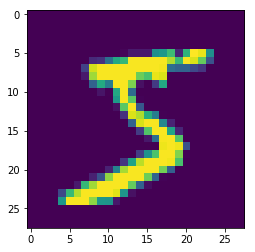

In [33]:
#plot the first image in the dataset
plt.imshow(X_train[0])
#check image shape
X_train[0].shape

In [34]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [37]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Careful! it could be hard to your computer (memory speaking)

In [38]:
#train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 269s 4ms/step - loss: 11.2454 - acc: 0.3017 - val_loss: 9.6240 - val_acc: 0.4028
Epoch 2/3
60000/60000 [==============================] - 256s 4ms/step - loss: 9.6785 - acc: 0.3994 - val_loss: 10.4974 - val_acc: 0.3484
Epoch 3/3
60000/60000 [==============================] - 282s 5ms/step - loss: 9.8130 - acc: 0.3910 - val_loss: 9.5838 - val_acc: 0.4054


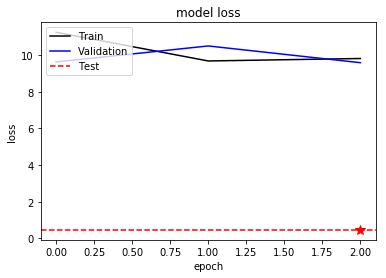

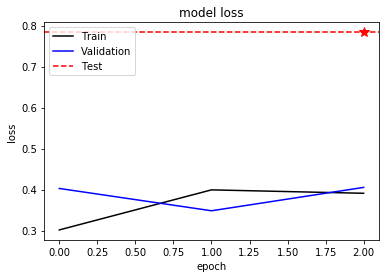

In [39]:
#Trainning plot.
plot(history.history['loss'],history.history['val_loss'],score[0])
plot(history.history['acc'],history.history['val_acc'],score[1])

## Mini-Batch Gradient Descent (SGD)

Cost function is averaged over a small number of training examples


Disadvantage:
- It requires the configuration of the hyperparameter of the size of each batch.

Advantage:
<img src = images/MBGD-vs-the-rest.png width="450" height="550">


Observation:

<img src = images/lecunn.png width="350" height="450">

For personal [read](https://arxiv.org/abs/1804.07612)

In [42]:
batch_size = 32
num_classes = 10
epochs = 50

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train[:1500]
y_train = y_train[:1500]
x_test = x_test[:1500]
y_test = y_test[:1500]
x_test /= 255
x_train /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (1500, 28, 28, 1)
1500 train samples
1500 test samples
Train on 1500 samples, validate on 1500 samples
Epoch 1/50
1500/1500 [==============================] - 9s 6ms/step - loss: 1.6458 - acc: 0.4460 - val_loss: 0.8166 - val_acc: 0.7367
Epoch 2/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.7693 - acc: 0.7660 - val_loss: 0.6051 - val_acc: 0.8040
Epoch 3/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.6003 - acc: 0.8153 - val_loss: 0.4786 - val_acc: 0.8453
Epoch 4/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4842 - acc: 0.8553 - val_loss: 0.4891 - val_acc: 0.8393
Epoch 5/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4175 - acc: 0.8707 - val_loss: 0.3699 - val_acc: 0.8860
Epoch 6/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3422 - acc: 0.8900 - val_loss: 0.3281 - val_acc: 0.8933
Epoch 7/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0

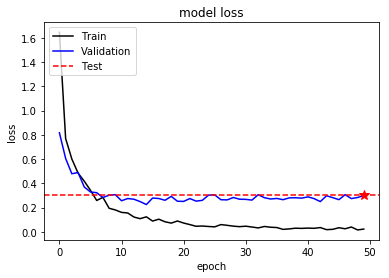

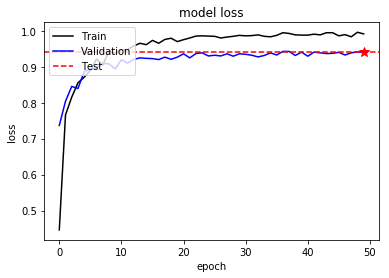

In [43]:
#Trainning plot.
plot(history.history['loss'],history.history['val_loss'],score[0])
plot(history.history['acc'],history.history['val_acc'],score[1])

Train on 1500 samples, validate on 1500 samples
Epoch 1/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0238 - acc: 0.9920 - val_loss: 0.2961 - val_acc: 0.9407
Epoch 2/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0223 - acc: 0.9900 - val_loss: 0.2731 - val_acc: 0.9427
Epoch 3/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0282 - acc: 0.9900 - val_loss: 0.2807 - val_acc: 0.9420
Epoch 4/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0198 - acc: 0.9927 - val_loss: 0.2899 - val_acc: 0.9347
Epoch 5/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0192 - acc: 0.9953 - val_loss: 0.2737 - val_acc: 0.9467
Epoch 6/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0207 - acc: 0.9933 - val_loss: 0.2684 - val_acc: 0.9440
Epoch 7/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0223 - acc: 0.9907 - val_loss: 0.2539 - val_acc: 0.9467
Epoch 8/50
15

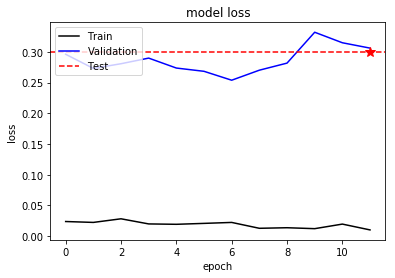

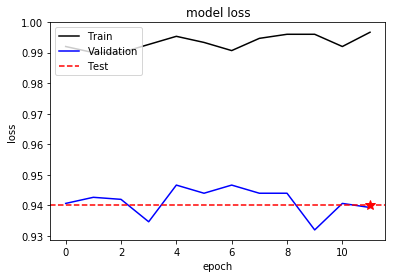

In [44]:
early_stopping_monitor = EarlyStopping(patience=5)

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[early_stopping_monitor])
#Trainning plot.
plot(history.history['loss'],history.history['val_loss'],score[0])
plot(history.history['acc'],history.history['val_acc'],score[1])

## And how it goes?

<img src = images/Cover3rd.png>

# Disclaimer  

This should be a good start to understanding CNNs, it is by no means a comprehensive overview. Things not discussed here include the nonlinear and pooling layers as well as hyperparameters of the network such as filter sizes. Topics like network architecture, batch normalization, vanishing gradients, initialization techniques, non-convex optimization, biases, choices of loss functions, data augmentation, regularization methods, computational considerations, modifications of backpropagation, and more were also not discussed 

## Extras
I higly reccommend the next links:
- [deep learning course](http://introtodeeplearning.com) del MIT
- A convolutional [neural network example for sign language](https://www.kaggle.com/pouryaayria/convolutional-neural-networks-tutorial-tensorflow) available in kaggle
- [When to Use MLP, CNN, and RNN Neural Networks](https://machinelearningmastery.com/when-to-use-mlp-cnn-and-rnn-neural-networks/)
- A series of CNN tutorials from scratch: [1](https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/), [2](https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/) and [3](https://adeshpande3.github.io/adeshpande3.github.io/The-9-Deep-Learning-Papers-You-Need-To-Know-About.html)
- [Simple Introduction to Convolutional Neural Networks](https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac)